<a href="https://colab.research.google.com/github/sejeong-park/Deeplearning_system/blob/main/L2_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid')

In [20]:
def data_gen(no=20,var=15):
  rng=np.random.RandomState(1)
  x=var*rng.rand(no)
  X=x.reshape(-1,1)
  y=2*x-1+rng.rand(no)
  return X,y

In [21]:
X,y=data_gen(no=25,var=15)

In [22]:
def L2_regression(X,y,eta=0.01,alpha=1, epochs=20): # ㅣ2 norm
  m=np.shape(X)[0]
  n=np.shape(X)[1]

  X=np.concatenate((np.ones((m,1)),X),axis=1)
  W=np.random.rand(n+1,)

  cost_hist=[]

  for iter_ in np.arange(epochs):
    error=X.dot(W)-y
    L2_term=(alpha/2*m)*np.sum(np.square(W))
    J=(1/2*m)*np.sum(error**2)+L2_term # 원래는 error의 MSE까지 했을 텐데, L2 Term을 더해줘

    dJ=(1/m)*(X.T.dot(error)+alpha*W)
    W-=eta*dJ

    if iter_==0 or iter_==epochs-1:
      print("At {} iteration, cost is {}".format(iter_,J))

      cost_hist.append(J)

  return W,cost_hist

At 0 iteration, cost is 34039.94441878412
At 9 iteration, cost is 152.41858623606956


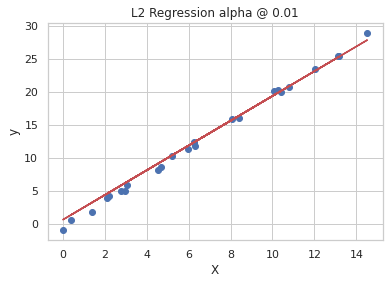

At 0 iteration, cost is 42719.24172778104
At 9 iteration, cost is 293.67426120852025


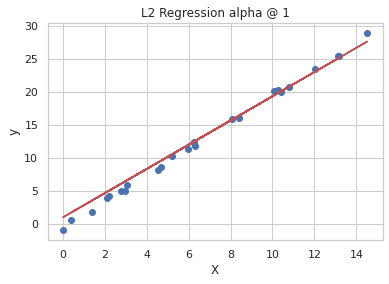

At 0 iteration, cost is 67208.86572264066
At 9 iteration, cost is 4464.116327924024


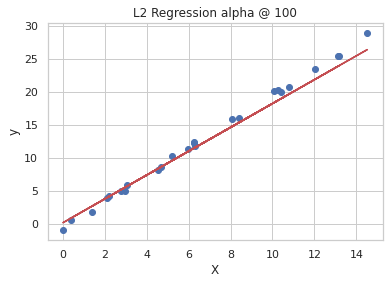

In [27]:
alpha=[0.01,1,100]

for alpha_ in alpha:
  weight,_ =L2_regression(X,y,eta=0.01,alpha=alpha_,epochs=10)
  fitted_line=np.dot(X,weight[1])+weight[0]
  plt.scatter(X,y)
  plt.plot(X,fitted_line,color='r')
  plt.xlabel("X")
  plt.ylabel("y")  #나중에 연구발표할때 꼭 함수에 labeling 해주고 title 맞춰줘라.. 만점 받아라
  plt.title("L2 Regression alpha @ {}".format(alpha_))
  plt.show()